## **Supply and demand analysis of the labour market in the Data environment: Global wages and conditions**.

   
**Data sources**:
- LinkedIn API for job vacancy data.
 
- Kaggle or Glassdoor for data on Data Scientists profiles.

**Summary**:

- **Hypothesis**: 'The United States is the best country to work in the data environment'

- **Questions to answer**:   

    - Are there specific regions of the world where Data Scientists have better salaries and working conditions compared to others?   

- **Objective**: To identify the regions of the world that offer the best salaries and working conditions for data environment employees.

- **EDA**:
    - Obtain data on job offers available through APIs such as LinkedIn.
    
    - Collect data on Data Scientist profiles and skills from Kaggle or Glassdoor.
    - Analyse the geographical distribution of job offers and data environment professionals.
    - Compare salaries offered in different regions and sectors.
    - Visualise trends in salary and working conditions for data environment globally.
- Potential for ML:
    - Forecasting: Predict the evolution of salaries and working conditions for data environment in different parts of the world.   
    
    - Ranking models: Develop models to rank regions according to competitive pay and working conditions for data environment.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import display_functions as dpf

import plotly.express as px
import folium
import json
import requests
import folium
from folium.plugins import MarkerCluster

import importlib
importlib.reload(dpf)

<module 'display_functions' from 'c:\\Users\\Noelia Montiel\\Bootcamp_DS\\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\\EDA\\src\\notebooks\\display_functions.py'>

In [146]:
# Loads all the DataFrames we are going to work with.
df1 = pd.read_csv("../data/1_DataScience_salaries_2024.csv")
df2 = pd.read_csv("../data/2_ds_salaries.csv")
df3 = pd.read_csv("../data/3_jobs_in_data.csv")

# Configures pandas to display all columns
pd.set_option('display.max_columns', None)

## 1. Data cleansing

### 1.1. Visualización de los 3 datasets

##### DF1

In [147]:
print(df1.info()) # Shows if there are nulls and the type of data in each column
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB
None


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


##### DF2

In [148]:
print(df2.info()) # Shows if there are nulls and the type of data in each column
df2.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


##### DF3

In [149]:
print(df3.info()) # Shows if there are nulls and the type of data in each column
df3.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


### 1.2. Adaptación de los DataFrames

Before unifying, I make some modifications to the DataFrames to avoid having NaNs when I put them together.

First of all, I think about the columns I am interested in and edit each DataFrame to keep that data and match the name of the columns and the type of representation of each one in the 3 datasets.

#### DF1

In [150]:
# Modify the columns that I think are convenient for a better understanding.

# Edit column 'experience_level'
df1['experience_level'] = df1['experience_level'].str.strip() # Removes any blank spaces at the beginning or at the end

def cat_experience_level_1(level): # Function to edit the column 'experience_level'.
    if level == 'EN':
        return 'Junior'
    elif level == 'MI':
        return 'Intermediate'
    elif level == 'SE':
        return 'Senior'
    return 'Expert'

df1['experience_level'] = df1['experience_level'].apply(cat_experience_level_1) # Modification of the column 'experience_level'


# Edit column 'employment_type'
df1['employment_type'] = df1['employment_type'].str.strip() # Removes any blank spaces at the beginning or at the end

def cat_employment_type(type): # Function to edit the column 'employment_type'
    if type == 'FT':
        return 'Full-time'
    elif type == 'PT':
        return 'Part-time'
    elif type == 'CT':
        return 'Contract'
    return 'Freelance'

df1['employment_type'] = df1['employment_type'].apply(cat_employment_type) # Modification of the column 'employment_type'


# Edit column 'remote_ratio'
def cat_remote_ratio(ratio): # Function to edit the column 'remote_ratio'
    if ratio == 0:
        return 'In-person'
    elif ratio == 50:
        return 'Hybrid'
    return 'Remote'

df1['remote_ratio'] = df1['remote_ratio'].apply(cat_remote_ratio) # Modification of the column 'remote_ratio'
df1['work_setting'] = df1['remote_ratio'] # Creation of a column equivalent to 'work_setting' with the name we want to use
df1.drop(columns = 'remote_ratio', inplace = True) # Removal of the old column

In [151]:
df1.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size,work_setting
0,2021,Intermediate,Full-time,Data Scientist,30400000,CLP,40038,CL,CL,L,Remote
1,2021,Intermediate,Full-time,BI Data Analyst,11000000,HUF,36259,HU,US,L,Hybrid
2,2020,Intermediate,Full-time,Data Scientist,11000000,HUF,35735,HU,HU,L,Hybrid
3,2021,Intermediate,Full-time,ML Engineer,8500000,JPY,77364,JP,JP,S,Hybrid
4,2022,Senior,Full-time,Lead Machine Learning Engineer,7500000,INR,95386,IN,IN,L,Hybrid


#### DF2

In [152]:
# Edit column 'experience_level'
df2['experience_level'] = df2['experience_level'].str.strip() # Removes any blank spaces at the beginning or at the end
df2['experience_level'] = df2['experience_level'].apply(cat_experience_level_1)

# Edit column 'employment_type'
df2['employment_type'] = df2['employment_type'].str.strip() # Removes any blank spaces at the beginning or at the end
df2['employment_type'] = df2['employment_type'].apply(cat_employment_type)

# Edit column 'remote_ratio'
df2['remote_ratio'] = df2['remote_ratio'].apply(cat_remote_ratio)
df2['work_setting'] = df2['remote_ratio'] # Creation of a column equivalent to 'work_setting' with the name we want to use
df2.drop(columns = 'remote_ratio', inplace = True) # Removal of the old column

In [153]:
df2.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size,work_setting
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,ES,L,Remote
1,2023,Intermediate,Contract,ML Engineer,30000,USD,30000,US,US,S,Remote
2,2023,Intermediate,Contract,ML Engineer,25500,USD,25500,US,US,S,Remote
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,CA,M,Remote
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,CA,M,Remote


#### DF3

In [154]:
df3.experience_level.value_counts()

experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

In [155]:
df3.employment_type.value_counts()

employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64

In [156]:
# Edit column 'experience_level'
df3['experience_level'] = df3['experience_level'].str.strip() # Removes any blank spaces at the beginning or at the end

def cat_experience_level_2(level): # Function to edit the column 'experience_level'
    if level == 'Entry-level':
        return 'Junior'
    elif level == 'Mid-level':
        return 'Intermediate'
    elif level == 'Executive':
        return 'Expert'
    return 'Senior'

df3['experience_level'] = df3['experience_level'].apply(cat_experience_level_2) # Modification of the column 'experience_level'


# Edit column 'employment_type'
df3['employment_type'] = df3['employment_type'].str.strip() # Removes any blank spaces at the beginning or at the end

In [157]:
df3.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Intermediate,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


### 1.3. DataFrames unification

In [158]:
# Join datasets
df_combined = pd.concat([df1, df2, df3], ignore_index = True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27948 entries, 0 to 27947
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           27948 non-null  int64 
 1   experience_level    27948 non-null  object
 2   employment_type     27948 non-null  object
 3   job_title           27948 non-null  object
 4   salary              27948 non-null  int64 
 5   salary_currency     27948 non-null  object
 6   salary_in_usd       27948 non-null  int64 
 7   employee_residence  27948 non-null  object
 8   company_location    27948 non-null  object
 9   company_size        27948 non-null  object
 10  work_setting        27948 non-null  object
 11  job_category        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 2.6+ MB


In [159]:
# Arrange the columns in the order I think is appropriate
new_order = ['job_title', 'job_category', 'experience_level', 'salary', 'salary_currency', 'salary_in_usd', 'company_location', 'employee_residence',
             'work_setting', 'employment_type', 'company_size', 'work_year']

# Rearrange the columns
df_combined = df_combined[new_order]

df_combined

,job_title,job_category,experience_level,salary,salary_currency,salary_in_usd,company_location,employee_residence,work_setting,employment_type,company_size,work_year
0,Data Scientist,NaN,Intermediate,30400000,CLP,40038,CL,CL,Remote,Full-time,L,2021
1,BI Data Analyst,NaN,Intermediate,11000000,HUF,36259,US,HU,Hybrid,Full-time,L,2021
2,Data Scientist,NaN,Intermediate,11000000,HUF,35735,HU,HU,Hybrid,Full-time,L,2020
3,ML Engineer,NaN,Intermediate,8500000,JPY,77364,JP,JP,Hybrid,Full-time,S,2021
4,Lead Machine Learning Engineer,NaN,Senior,7500000,INR,95386,IN,IN,Hybrid,Full-time,L,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
27943,Data Specialist,Data Management and Strategy,Senior,165000,USD,165000,United States,United States,Remote,Full-time,L,2021
27944,Data Scientist,Data Science and Research,Senior,412000,USD,412000,United States,United States,Remote,Full-time,L,2020
27945,Principal Data Scientist,Data Science and Research,Intermediate,151000,USD,151000,United States,United States,Remote,Full-time,L,2021
27946,Data Scientist,Data Science and Research,Junior,105000,USD,105000,United States,United States,Remote,Full-time,S,2020


In [160]:
# Modification of the columns 'company_location' and 'employee_residence'
set_company_location = set(df_combined.company_location.to_list())
set_employee_residence = set(df_combined.employee_residence.to_list())

# Join the sets to obtain all unique items
set_combined = set_company_location.union(set_employee_residence)

print(set_combined)

{'CY', 'Kenya', 'JP', 'NG', 'VN', 'Qatar', 'CL', 'Ireland', 'Malaysia', 'Jersey', 'Turkey', 'Costa Rica', 'BO', 'Portugal', 'Bolivia', 'AS', 'ZA', 'LV', 'RO', 'AU', 'QA', 'Australia', 'FI', 'United Arab Emirates', 'Colombia', 'Tunisia', 'KE', 'SG', 'Philippines', 'Denmark', 'Egypt', 'GE', 'Peru', 'China', 'Spain', 'Switzerland', 'BE', 'EE', 'Argentina', 'American Samoa', 'Netherlands', 'Indonesia', 'MD', 'Malta', 'NO', 'BA', 'BR', 'United Kingdom', 'Romania', 'GI', 'GR', 'Iraq', 'Poland', 'Estonia', 'Czech Republic', 'LB', 'MK', 'Central African Republic', 'Mexico', 'KW', 'NL', 'Honduras', 'Iran', 'SE', 'Andorra', 'Canada', 'IE', 'Sweden', 'IL', 'Vietnam', 'OM', 'HR', 'AR', 'HU', 'PT', 'Luxembourg', 'AM', 'Singapore', 'NZ', 'DZ', 'BS', 'UG', 'Pakistan', 'SI', 'IN', 'Armenia', 'Bulgaria', 'MU', 'Finland', 'Saudi Arabia', 'SA', 'France', 'RU', 'Puerto Rico', 'Russia', 'Cyprus', 'Serbia', 'LT', 'PH', 'EG', 'CN', 'Austria', 'Croatia', 'Italy', 'UZ', 'Georgia', 'DK', 'Belgium', 'India', 'MY

In [161]:
# Me quedo solo con los países que están reflejados con su diminutivo (dos caracteres)
diminutives = {country for country in set_combined if len(country) == 2}
diminutives

{'AD',
 'AE',
 'AL',
 'AM',
 'AR',
 'AS',
 'AT',
 'AU',
 'BA',
 'BE',
 'BG',
 'BO',
 'BR',
 'BS',
 'CA',
 'CF',
 'CH',
 'CL',
 'CN',
 'CO',
 'CR',
 'CY',
 'CZ',
 'DE',
 'DK',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'ES',
 'FI',
 'FR',
 'GB',
 'GE',
 'GH',
 'GI',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'KR',
 'KW',
 'LB',
 'LT',
 'LU',
 'LV',
 'MA',
 'MD',
 'MK',
 'MT',
 'MU',
 'MX',
 'MY',
 'NG',
 'NL',
 'NO',
 'NZ',
 'OM',
 'PE',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'QA',
 'RO',
 'RS',
 'RU',
 'SA',
 'SE',
 'SG',
 'SI',
 'SK',
 'TH',
 'TN',
 'TR',
 'UA',
 'UG',
 'US',
 'UZ',
 'VN',
 'ZA'}

In [162]:
country_mapping = {
    'AD': 'Andorra',
    'AE': 'United Arab Emirates',
    'AL': 'Albania',
    'AM': 'Armenia',
    'AR': 'Argentina',
    'AS': 'American Samoa',
    'AT': 'Austria',
    'AU': 'Australia',
    'BA': 'Bosnia and Herzegovina',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BS': 'Bahamas',
    'CA': 'Canada',
    'CF': 'Central African Republic',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CN': 'China',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'DZ': 'Algeria',
    'EC': 'Ecuador',
    'EE': 'Estonia',
    'EG': 'Egypt',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GE': 'Georgia',
    'GH': 'Ghana',
    'GI': 'Gibraltar',
    'GR': 'Greece',
    'HK': 'Hong Kong',
    'HN': 'Honduras',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IQ': 'Iraq',
    'IR': 'Iran',
    'IT': 'Italy',
    'JE': 'Jersey',
    'JP': 'Japan',
    'KE': 'Kenya',
    'KR': 'South Korea',
    'KW': 'Kuwait',
    'LB': 'Lebanon',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MA': 'Morocco',
    'MD': 'Moldova',
    'MK': 'North Macedonia',
    'MT': 'Malta',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NG': 'Nigeria',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'NZ': 'New Zealand',
    'OM': 'Oman',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PK': 'Pakistan',
    'PL': 'Poland',
    'PR': 'Puerto Rico',
    'PT': 'Portugal',
    'QA': 'Qatar',
    'RO': 'Romania',
    'RS': 'Serbia',
    'RU': 'Russia',
    'SA': 'Saudi Arabia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'TH': 'Thailand',
    'TN': 'Tunisia',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'UG': 'Uganda',
    'US': 'United States',
    'UZ': 'Uzbekistan',
    'VN': 'Vietnam',
    'ZA': 'South Africa'
}


df_combined['company_location'] = df_combined['company_location'].replace(country_mapping)
df_combined['employee_residence'] = df_combined['employee_residence'].replace(country_mapping)
df_combined.head(5)

,job_title,job_category,experience_level,salary,salary_currency,salary_in_usd,company_location,employee_residence,work_setting,employment_type,company_size,work_year
0,Data Scientist,NaN,Intermediate,30400000,CLP,40038,Chile,Chile,Remote,Full-time,L,2021
1,BI Data Analyst,NaN,Intermediate,11000000,HUF,36259,United States,Hungary,Hybrid,Full-time,L,2021
2,Data Scientist,NaN,Intermediate,11000000,HUF,35735,Hungary,Hungary,Hybrid,Full-time,L,2020
3,ML Engineer,NaN,Intermediate,8500000,JPY,77364,Japan,Japan,Hybrid,Full-time,S,2021
4,Lead Machine Learning Engineer,NaN,Senior,7500000,INR,95386,India,India,Hybrid,Full-time,L,2022


In [163]:
set(df_combined.job_title.to_list())

{'3D Computer Vision Researcher',
 'AI Architect',
 'AI Developer',
 'AI Engineer',
 'AI Product Manager',
 'AI Programmer',
 'AI Research Engineer',
 'AI Research Scientist',
 'AI Scientist',
 'AI Software Engineer',
 'AWS Data Architect',
 'Admin & Data Analyst',
 'Analytics Engineer',
 'Analytics Engineering Manager',
 'Applied Data Scientist',
 'Applied Machine Learning Engineer',
 'Applied Machine Learning Scientist',
 'Applied Research Scientist',
 'Applied Scientist',
 'Autonomous Vehicle Technician',
 'Azure Data Engineer',
 'BI Analyst',
 'BI Data Analyst',
 'BI Data Engineer',
 'BI Developer',
 'Big Data Architect',
 'Big Data Developer',
 'Big Data Engineer',
 'Business Data Analyst',
 'Business Intelligence',
 'Business Intelligence Analyst',
 'Business Intelligence Data Analyst',
 'Business Intelligence Developer',
 'Business Intelligence Engineer',
 'Business Intelligence Lead',
 'Business Intelligence Manager',
 'Business Intelligence Specialist',
 'CRM Data Analyst',
 '

In [164]:
df_combined.job_category.value_counts()

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

In [165]:
# Remove the NaNs from the column ‘job_category’ and give it the value that corresponds to it

# Importing the library needed to use regular expressions
import re

def classify_job_title(title): # Sort 'job_category' according to the column 'job_title'
    
    title = title.lower() # Convert title to lowercase to make search case insensitive
    
    # Specific categories based on title patterns
    if re.search(r'\bdata scientist\b|\bdata science\b|\bresearch\b', title):
        return 'Data Science and Research'
    elif re.search(r'\bmachine learning\b|\bml\b|\bai\b|\bdeep learning\b', title):
        return 'Machine Learning and AI'
    elif re.search(r'\bbi\b|\bvisualization\b|\breporting\b|\bpower bi\b', title):
        return 'BI and Visualization'
    elif re.search(r'\bdata engineer\b|\bengineer\b|\bengineering\b|\bdata platform\b', title):
        return 'Data Engineering'
    elif re.search(r'\bdata analysis\b|\bdata analyst\b|\banalyst\b|\banalyst\b|\banalysis\b', title):
        return 'Data Analysis'
    elif re.search(r'\bcloud\b|\bdatabase\b|\bdevops\b|\baws\b|\bazure\b', title):
        return 'Cloud and Database'
    elif re.search(r'\bleadership\b|\bmanager\b|\bmanagement\b|\bdirector\b', title):
        return 'Leadership and Management'
    elif re.search(r'\bdata quality\b|\boperations\b|\bdata governance\b', title):
        return 'Data Quality and Operations'
    elif re.search(r'\bdata architecture\b||\bdata architect\b\bmodeling\b|\bdata modeller\b', title):
        return 'Data Architecture and Modeling'
    elif re.search(r'\bstrategy\b|\bdata management\b|\bdata strategy\b', title):
        return 'Data Management and Strategy'
    else:
        return 'Unknown'  # Default category if it does not match any

# Applies the function to fill the NaNs in job_category
df_combined['job_category'] = df_combined.apply(lambda row: classify_job_title(row['job_title']) if pd.isna(row['job_category']) else row['job_category'], axis = 1)

df_combined


,job_title,job_category,experience_level,salary,salary_currency,salary_in_usd,company_location,employee_residence,work_setting,employment_type,company_size,work_year
0,Data Scientist,Data Science and Research,Intermediate,30400000,CLP,40038,Chile,Chile,Remote,Full-time,L,2021
1,BI Data Analyst,BI and Visualization,Intermediate,11000000,HUF,36259,United States,Hungary,Hybrid,Full-time,L,2021
2,Data Scientist,Data Science and Research,Intermediate,11000000,HUF,35735,Hungary,Hungary,Hybrid,Full-time,L,2020
3,ML Engineer,Machine Learning and AI,Intermediate,8500000,JPY,77364,Japan,Japan,Hybrid,Full-time,S,2021
4,Lead Machine Learning Engineer,Machine Learning and AI,Senior,7500000,INR,95386,India,India,Hybrid,Full-time,L,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
27943,Data Specialist,Data Management and Strategy,Senior,165000,USD,165000,United States,United States,Remote,Full-time,L,2021
27944,Data Scientist,Data Science and Research,Senior,412000,USD,412000,United States,United States,Remote,Full-time,L,2020
27945,Principal Data Scientist,Data Science and Research,Intermediate,151000,USD,151000,United States,United States,Remote,Full-time,L,2021
27946,Data Scientist,Data Science and Research,Junior,105000,USD,105000,United States,United States,Remote,Full-time,S,2020


In [166]:
# Check for duplicate rows
duplicates = sum(df_combined.duplicated())
print(f'There are {duplicates} duplicate rows')

There are 17981 duplicate rows


In [167]:
# Remove duplicate rows
df_combined.drop_duplicates(inplace = True)

In [168]:
# Verify that there are no more nulls and how the DataFrame looks like after cleaning it.
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9967 entries, 0 to 27943
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           9967 non-null   object
 1   job_category        9967 non-null   object
 2   experience_level    9967 non-null   object
 3   salary              9967 non-null   int64 
 4   salary_currency     9967 non-null   object
 5   salary_in_usd       9967 non-null   int64 
 6   company_location    9967 non-null   object
 7   employee_residence  9967 non-null   object
 8   work_setting        9967 non-null   object
 9   employment_type     9967 non-null   object
 10  company_size        9967 non-null   object
 11  work_year           9967 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 1012.3+ KB


In [169]:
df_combined

,job_title,job_category,experience_level,salary,salary_currency,salary_in_usd,company_location,employee_residence,work_setting,employment_type,company_size,work_year
0,Data Scientist,Data Science and Research,Intermediate,30400000,CLP,40038,Chile,Chile,Remote,Full-time,L,2021
1,BI Data Analyst,BI and Visualization,Intermediate,11000000,HUF,36259,United States,Hungary,Hybrid,Full-time,L,2021
2,Data Scientist,Data Science and Research,Intermediate,11000000,HUF,35735,Hungary,Hungary,Hybrid,Full-time,L,2020
3,ML Engineer,Machine Learning and AI,Intermediate,8500000,JPY,77364,Japan,Japan,Hybrid,Full-time,S,2021
4,Lead Machine Learning Engineer,Machine Learning and AI,Senior,7500000,INR,95386,India,India,Hybrid,Full-time,L,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
27888,Computer Vision Engineer,Machine Learning and AI,Junior,180000,DKK,28609,Denmark,Denmark,Hybrid,Part-time,S,2021
27891,BI Data Analyst,Data Analysis,Intermediate,98000,USD,98000,United States,United States,In-person,Full-time,M,2020
27918,Computer Vision Engineer,Machine Learning and AI,Senior,60000,USD,60000,United States,Russia,Remote,Freelance,S,2020
27920,Computer Vision Engineer,Machine Learning and AI,Senior,102000,BRL,18907,Brazil,Brazil,In-person,Full-time,M,2021


In [170]:
df_combined.groupby(['job_category', 'job_title']).count()

experience_level  \
job_category            job_title                                               
BI and Visualization    BI Analyst                                         36   
                        BI Data Analyst                                    23   
                        BI Data Engineer                                    1   
                        BI Developer                                       57   
                        Business Intelligence Analyst                      50   
...                                                                       ...   
Machine Learning and AI Machine Learning Software Engineer                 16   
                        Machine Learning Specialist                         2   
                        NLP Engineer                                       12   
                        Principal Machine Learning Engineer                 3   
                        Staff Machine Learning Engineer                     1   

                                                             salary  \
job_category            job_title                                     
BI and Visualization    BI Analyst                               36   
                        BI Data Analyst                          23   
                        BI Data Engineer                          1   
                        BI Developer                             57   
                        Business Intelligence Analyst            50   
...                                                             ...   
Machine Learning and AI Machine Learning Software Engineer       16   
                        Machine Learning Specialist               2   
                        NLP Engineer                             12   
                        Principal Machine Learning Engineer       3   
                        Staff Machine Learning Engineer           1   

                                                             salary_currency  \
job_category            job_title                                              
BI and Visualization    BI Analyst                                        36   
                        BI Data Analyst                                   23   
                        BI Data Engineer                                   1   
                        BI Developer                                      57   
                        Business Intelligence Analyst                     50   
...                                                                      ...   
Machine Learning and AI Machine Learning Software Engineer                16   
                        Machine Learning Specialist                        2   
                        NLP Engineer                                      12   
                        Principal Machine Learning Engineer                3   
                        Staff Machine Learning Engineer                    1   

                                                             salary_in_usd  \
job_category            job_title                                            
BI and Visualization    BI Analyst                                      36   
                        BI Data Analyst                                 23   
                        BI Data Engineer                                 1   
                        BI Developer                                    57   
                        Business Intelligence Analyst                   50   
...                                                                    ...   
Machine Learning and AI Machine Learning Software Engineer              16   
                        Machine Learning Specialist                      2   
                        NLP Engineer                                    12   
                        Principal Machine Learning Engineer              3   
                        Staff Machine Learning Engineer                  1   

                           

In [171]:
df_combined.to_csv('../data/data_jobs.csv', sep = ',', index = False, encoding = 'utf-8')

## 2. Data analysis

### 2.1. Description of what each column of the dataset represents:

- *job_title*: Title of the job or position of the employee.    
Example: Data Scientist, Machine Learning Engineer...

- *job_category*: Job category.   
Example: Data Science and Research, Data Management and Strategy...

- *experience_level*: Level of experience of the employee.   
Example: Junior, Senior...

- *salary*: Gross salary of the employee, without currency conversions.

- *salary_currency*: Currency in which the salary is paid.
Example: USD (US Dollar), EUR (Euro), GBP (Pound Sterling)...

- *salary_in_usd*: Salary converted to US dollars (USD) for easy comparison.

- *company_location*: Country where the company's headquarters are located.
Example: US (United States), ES (Spain)...

- *employee_residence*: Country of residence of the employee.
Example: US (United States), ES (Spain)...

- *work_setting*: Proportion of work that is done remotely.   
It is coded as follows:
    - In-person: No remote work.
    - Hybrid: Partial remote work.
    - Remote: Full remote work.

- *employment_type*: Type of employment, indicating whether it is full-time, part-time, etc.    
Example: Full-time, Part-time...

- *company_size*: Company size, usually indicated by the number of employees.
The categories are as follows:
    - S: Small - 1 to 50 employees.
    - M: Medium - 51 to 250 employees.
    - L: Large - Over 250 employees.

- *work_year*: Year in which the work was performed or the registered wage was earned.

### 2.2. Univariate analysis

In [172]:
df_typification = pd.DataFrame([df_combined.nunique(), df_combined.nunique()/len(df_combined) * 100, df_combined.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

,Card,%_Card,Type
job_title,155,1.555132,object
job_category,10,0.100331,object
experience_level,4,0.040132,object
salary,2380,23.8788,int64
salary_currency,24,0.240795,object
salary_in_usd,2843,28.52413,int64
company_location,83,0.832748,object
employee_residence,91,0.913013,object
work_setting,3,0.030099,object
employment_type,4,0.040132,object


In [173]:
cat_cols = [
    'job_title',
    'job_category',
    'experience_level',
    'salary_currency',
    'company_location',
    'employee_residence',
    'work_setting',
    'employment_type',
    'company_size',
    'work_year'
]

df_combined[cat_cols].mode().T # Get the most common type of job offer.

,0
job_title,Data Engineer
job_category,Data Science and Research
experience_level,Senior
salary_currency,USD
company_location,United States
employee_residence,United States
work_setting,In-person
employment_type,Full-time
company_size,M
work_year,2023


In [174]:
df_combined.salary_in_usd.describe().round(2)

count      9967.00
mean     145113.26
std       73443.39
min        5132.00
25%       93850.00
50%      137000.00
75%      185000.00
max      800000.00
Name: salary_in_usd, dtype: float64

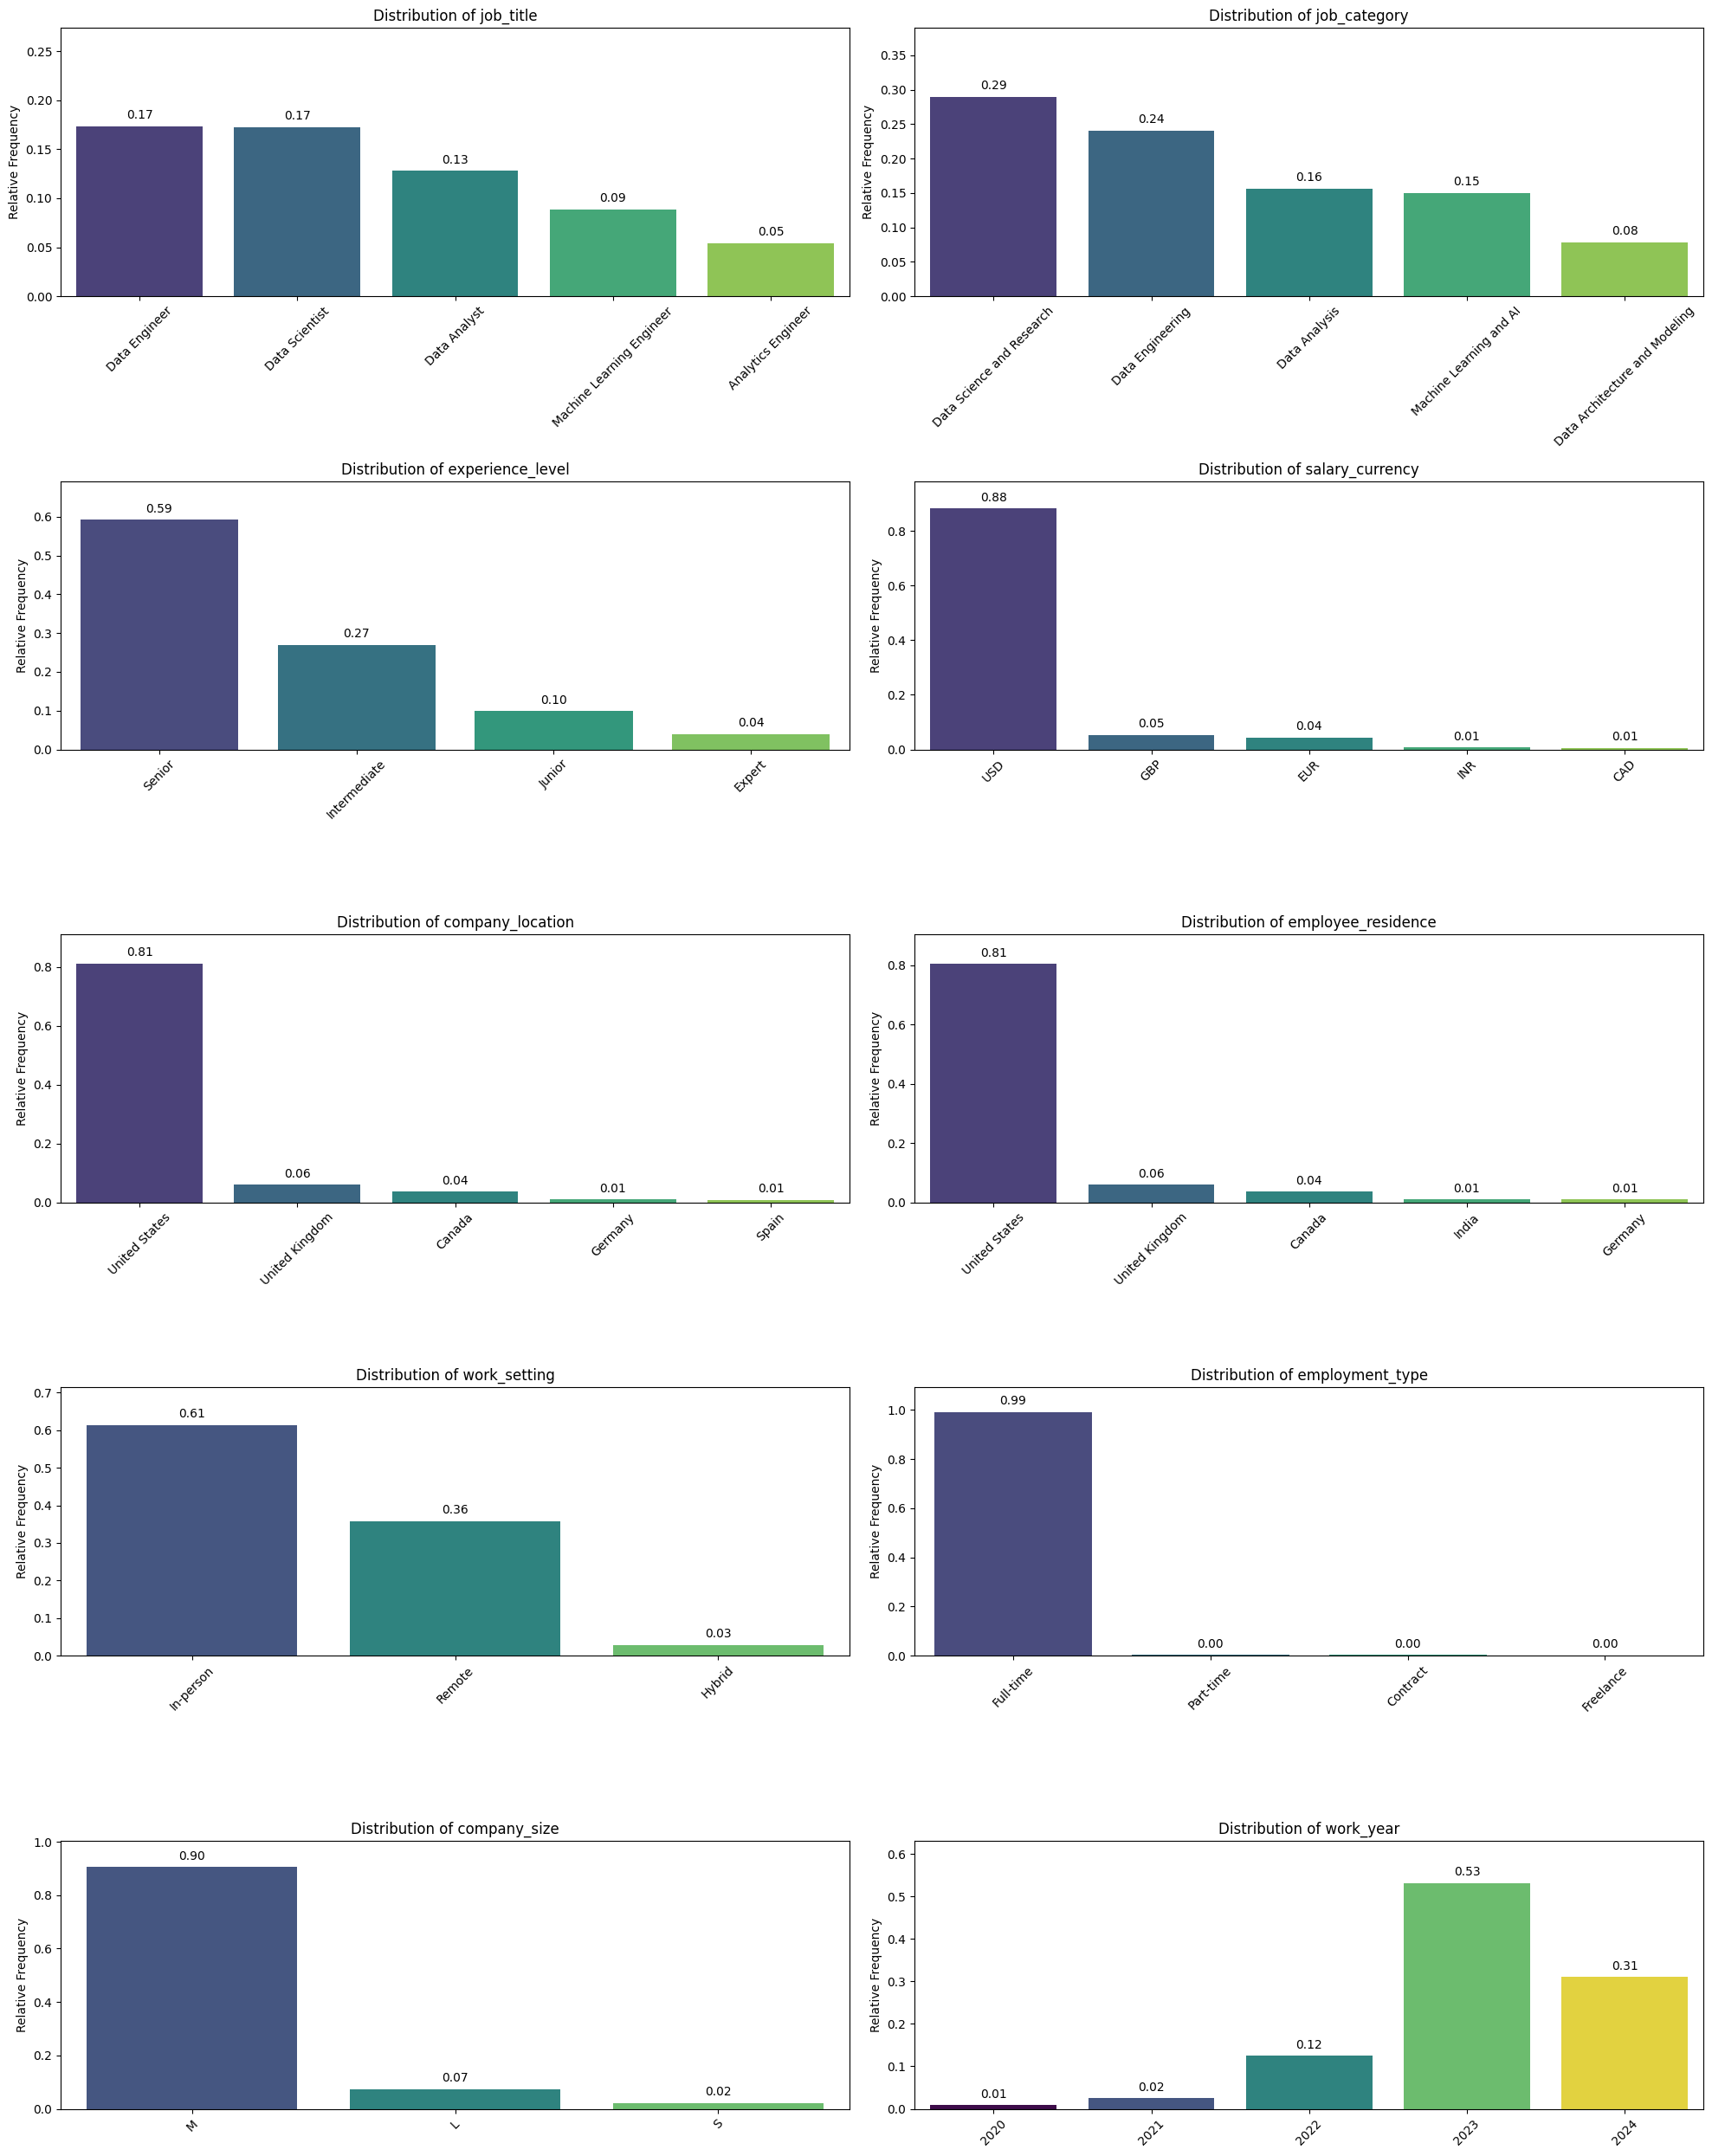

In [175]:
dpf.plot_categorical_distribution(df_combined, cat_cols, relative = True, show_values = True, limit = 5)

(2,)


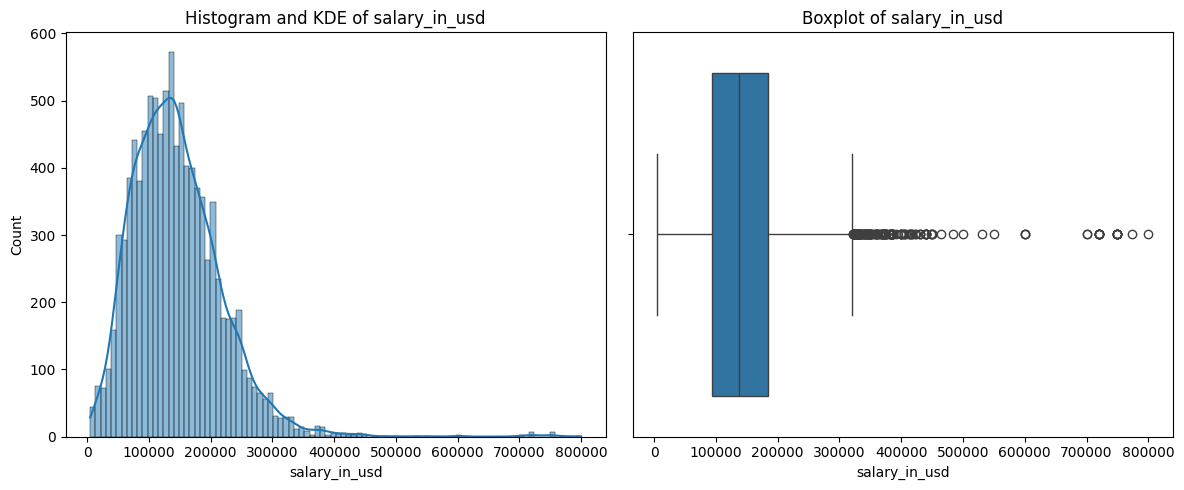

In [176]:
dpf.plot_combined_graphs(df_combined, ['salary_in_usd'])

### 2.3. Bivariate analysis

#### Analysis according to salary

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


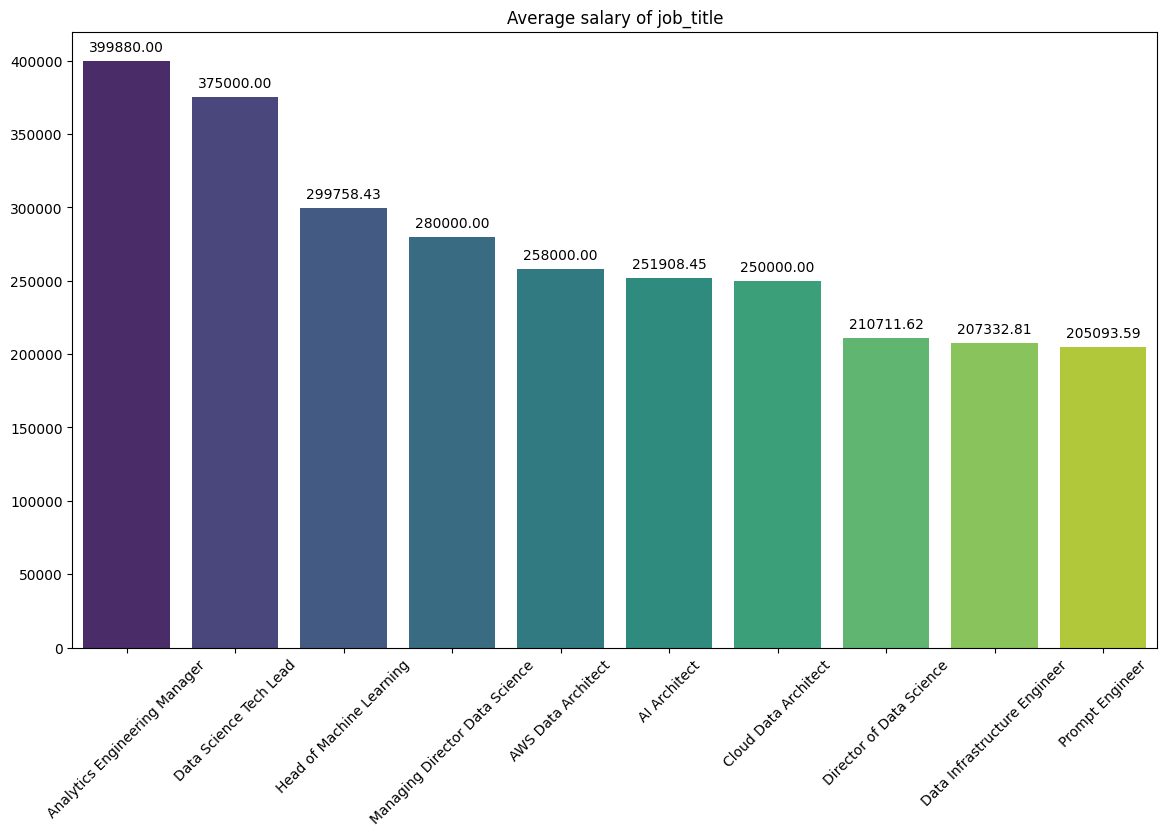

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


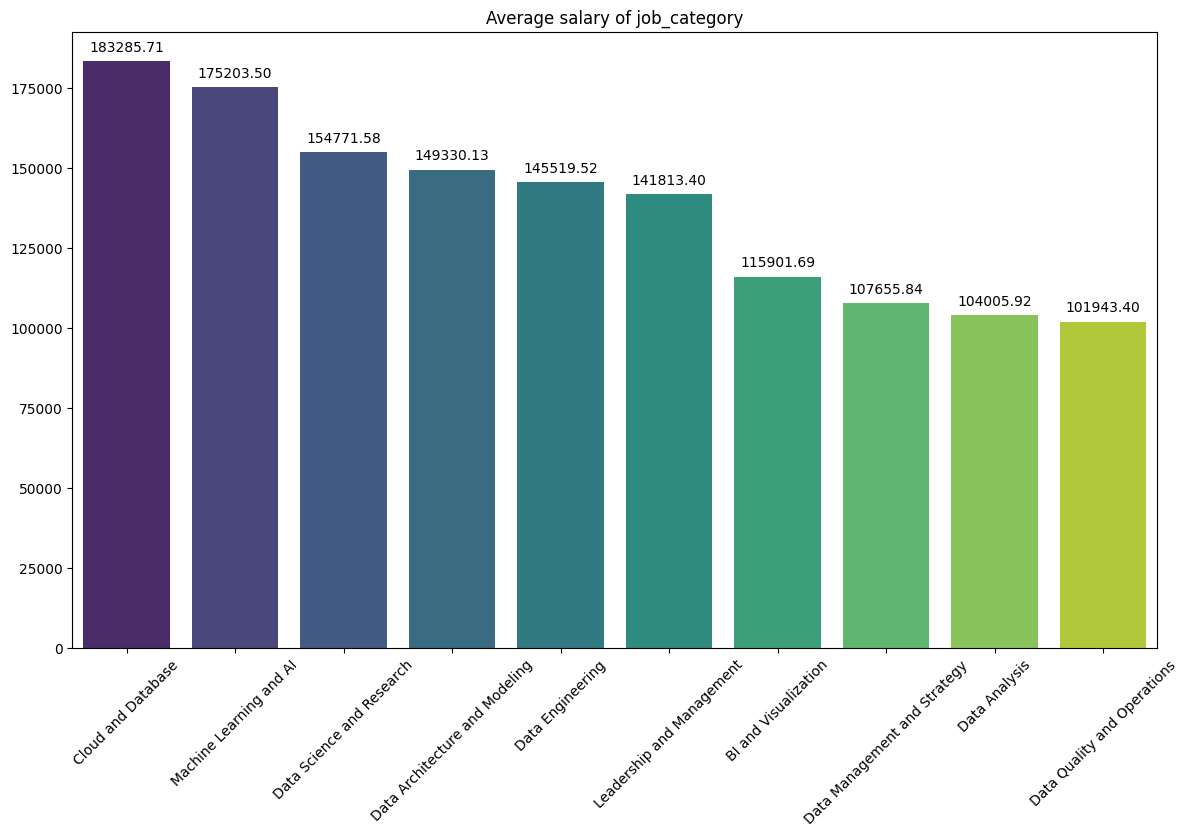

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


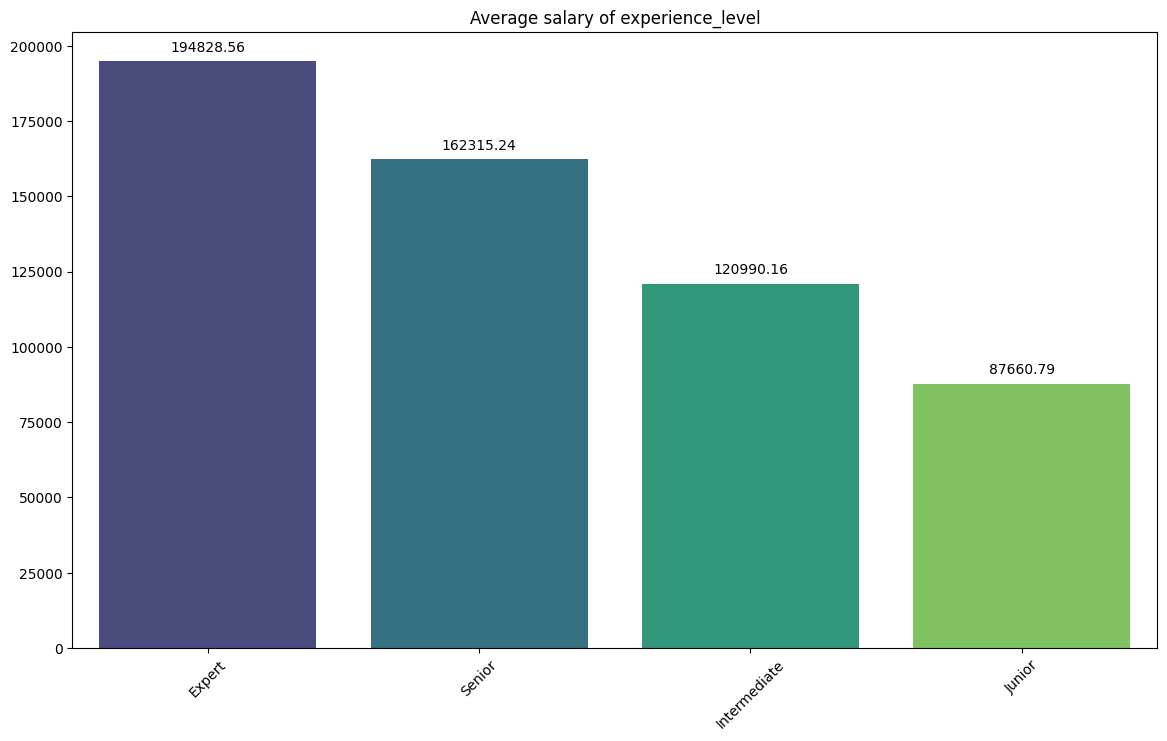

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


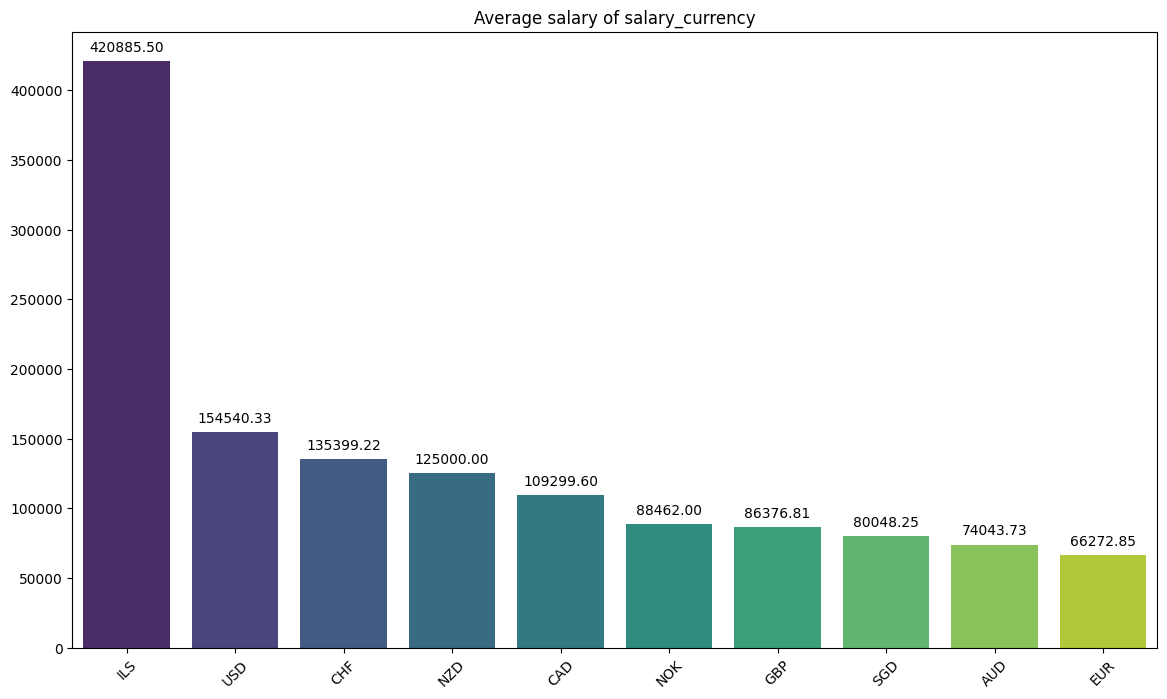

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


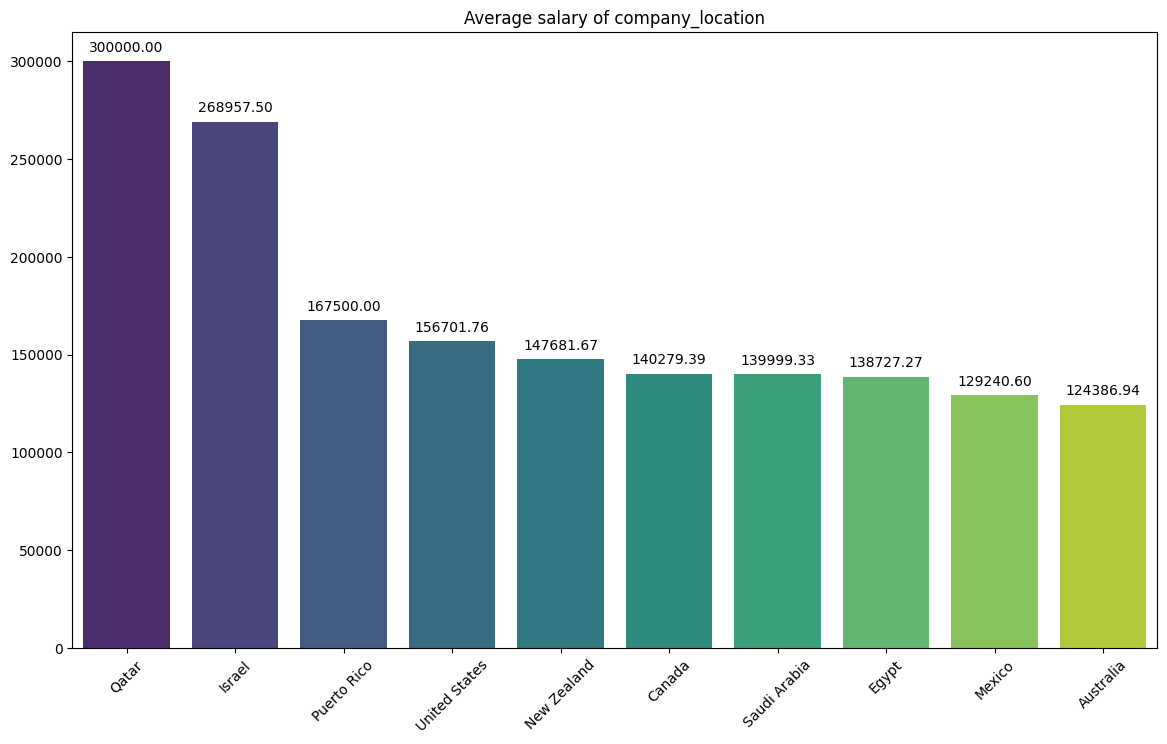

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


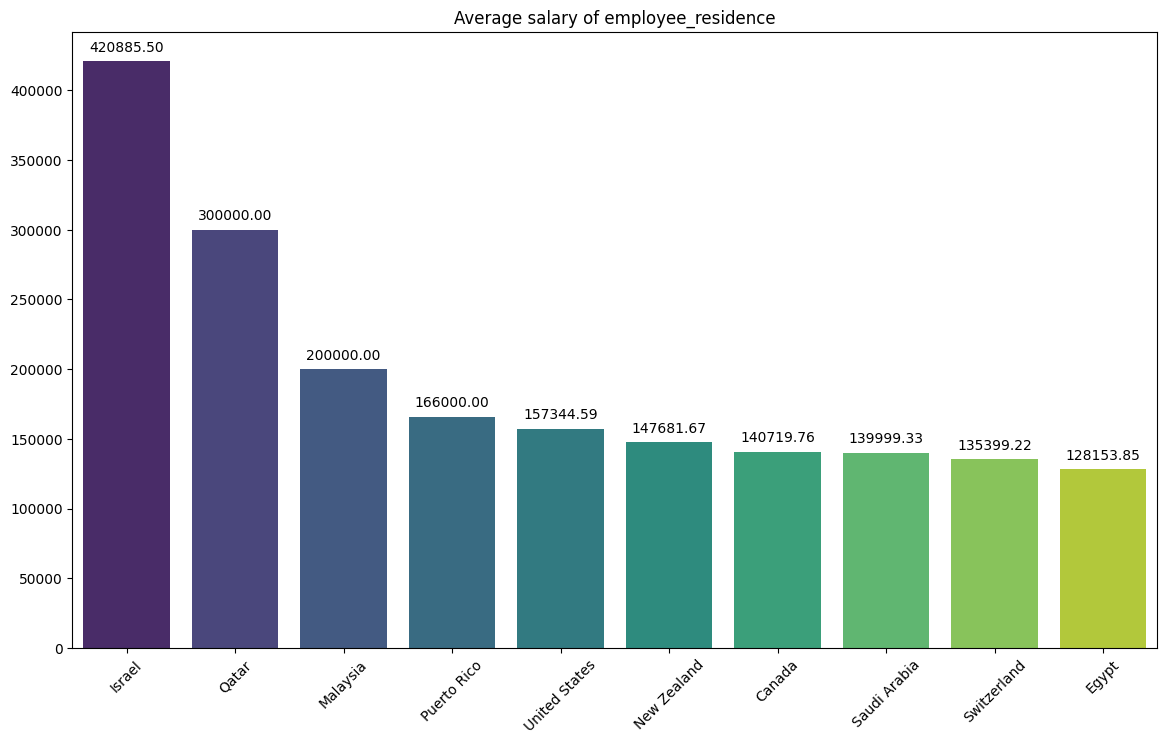

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


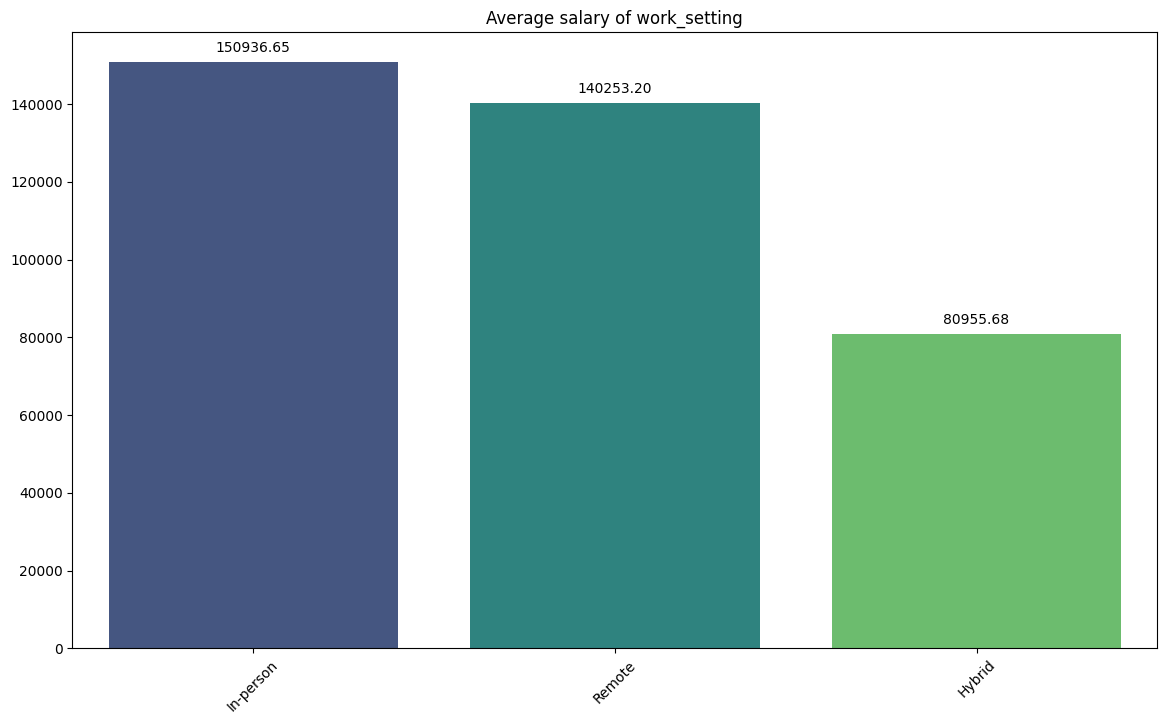

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


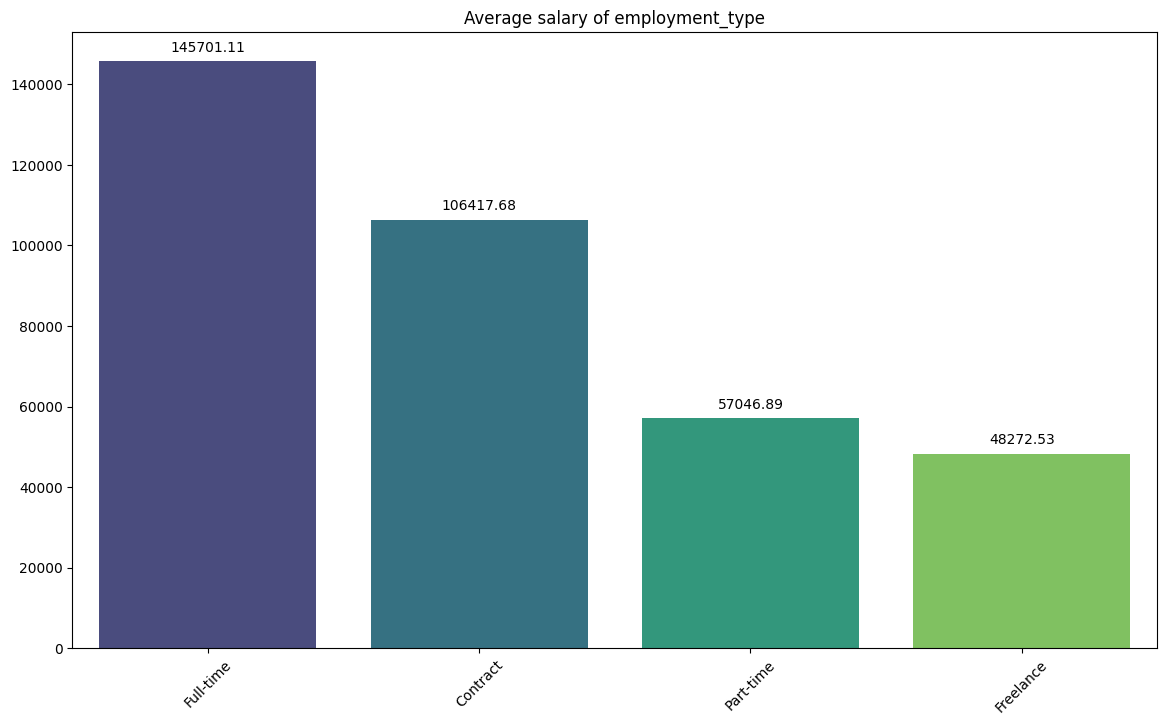

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


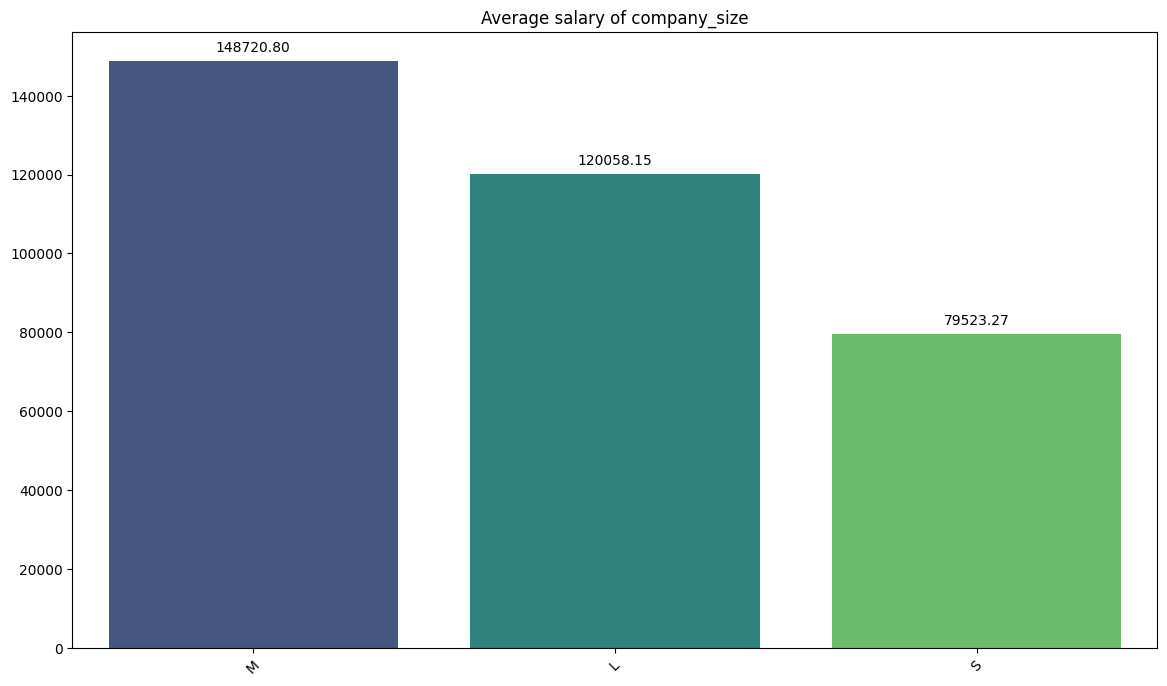

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = y, data = data, errorbar = None, hue = order_func, palette = palette, order = order)
c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\EDA\src\notebooks\display_functions.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


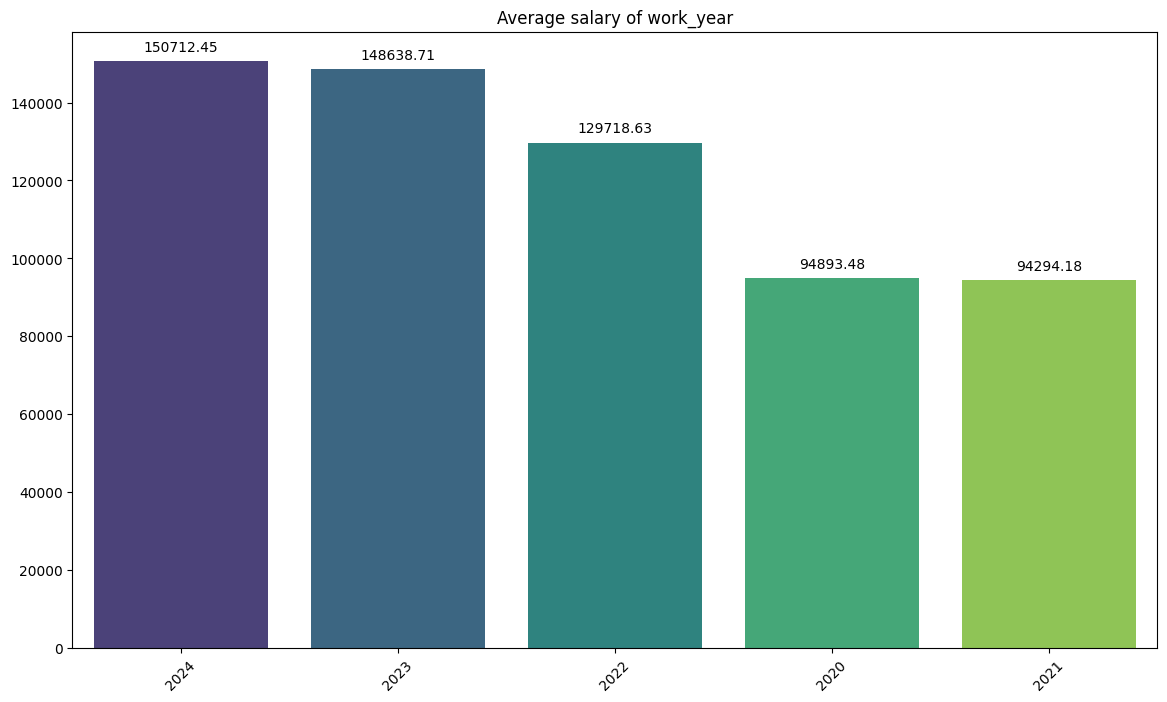

In [186]:
# Calculates the order of the categories based on the average of a specific numeric column.
def mean_order(data, col, num_col):
    return data.groupby(col)[num_col].mean().sort_values(ascending = False).index[:10]

dpf.plot_bar_with_values(data = df_combined, cat_cols = cat_cols, num_col = 'salary_in_usd', title = 'Average salary of {}', order_func = mean_order)

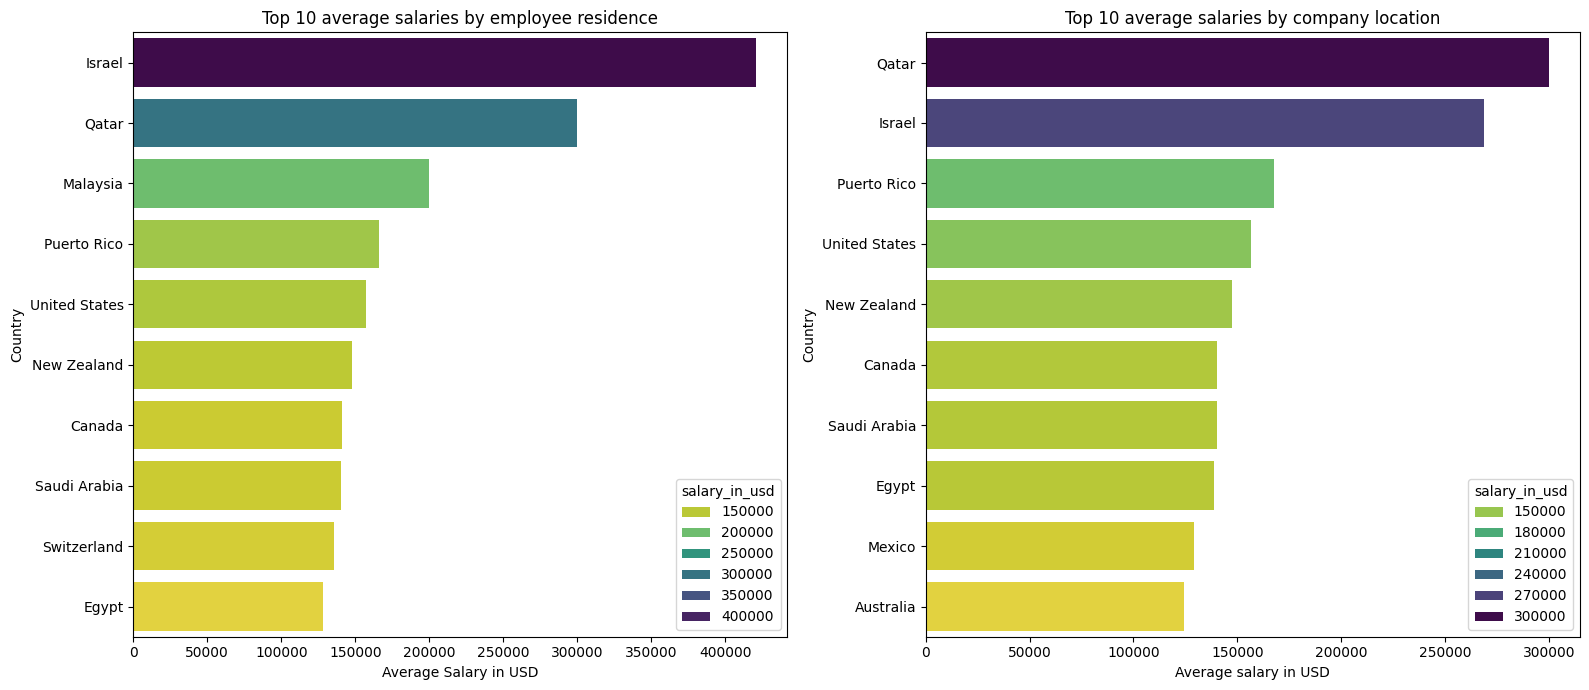

In [185]:
# Calculate the average salary by employee residence, filter for top 10 most common countries
top_employee_residence_salaries = df_combined.groupby('employee_residence')['salary_in_usd'].mean().nlargest(10).sort_values(ascending = False)

# Calculate the average salary by company location, filter for top 10 most common locations
top_company_location_salaries = df_combined.groupby('company_location')['salary_in_usd'].mean().nlargest(10).sort_values(ascending = False)

# Display the results
top_employee_residence_salaries, top_company_location_salaries

palette = sns.color_palette("viridis", as_cmap = True).reversed()

# Plotting
plt.figure(figsize = (16, 7))

# Average Salary by Employee Residence
plt.subplot(1, 2, 1)
sns.barplot(x = top_employee_residence_salaries.values, y = top_employee_residence_salaries.index, hue = top_employee_residence_salaries, palette = palette)
plt.title('Top 10 average salaries by employee residence')
plt.xlabel('Average Salary in USD')
plt.ylabel('Country')

# Average Salary by Company Location
plt.subplot(1, 2, 2)
sns.barplot(x = top_company_location_salaries.values, y = top_company_location_salaries.index, hue = top_company_location_salaries, palette = palette)
plt.title('Top 10 average salaries by company location')
plt.xlabel('Average salary in USD')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

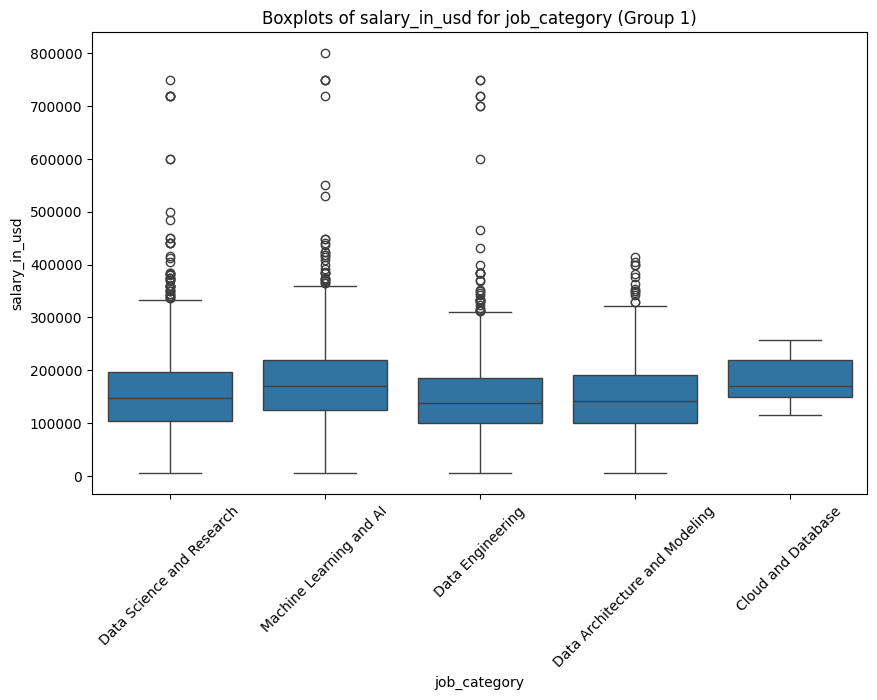

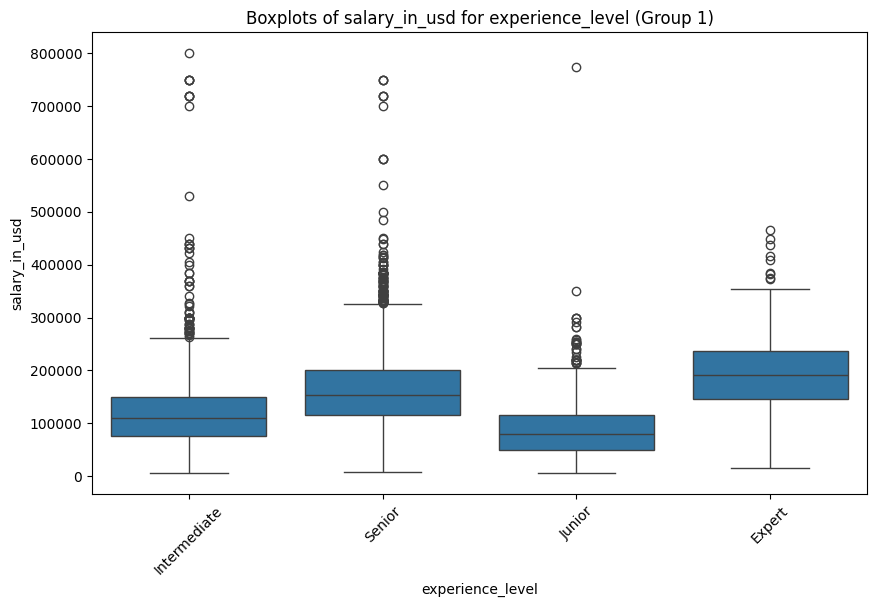

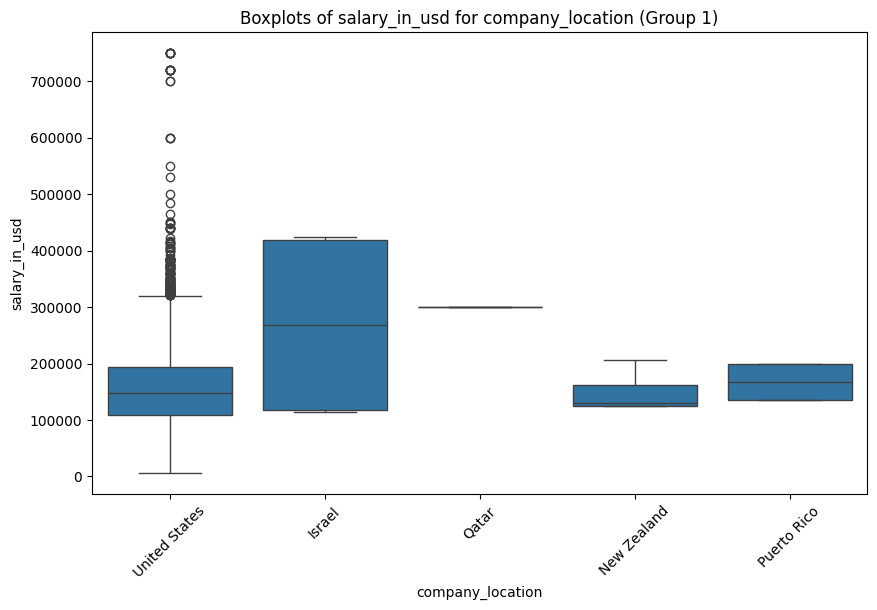

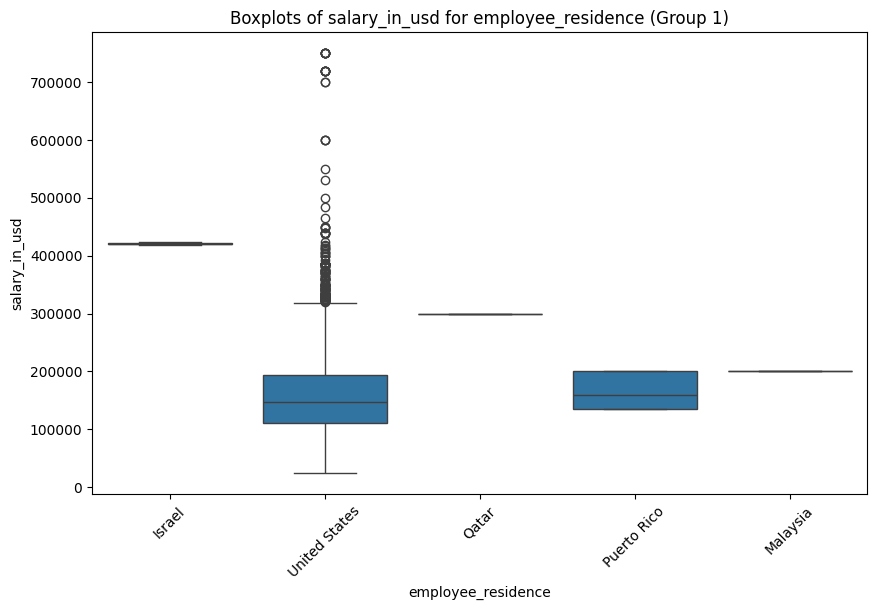

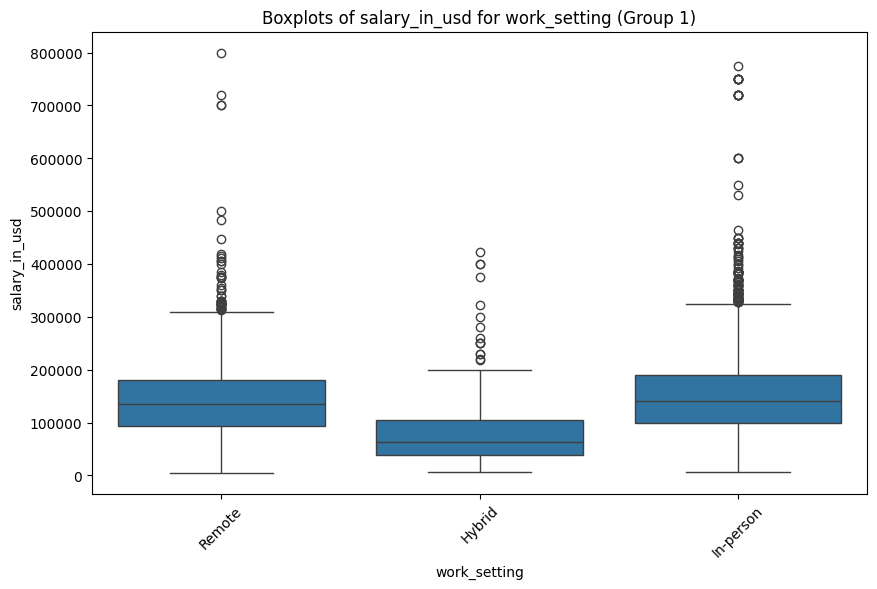

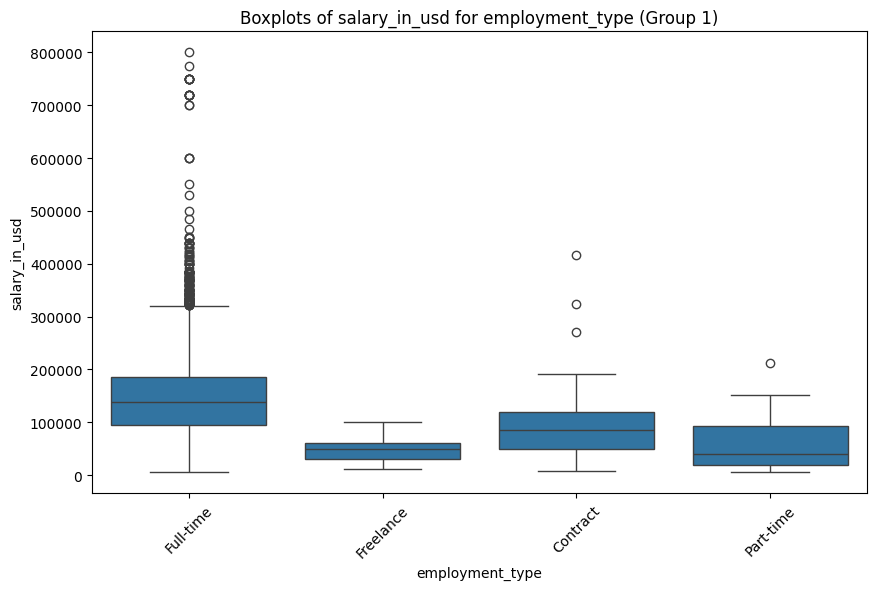

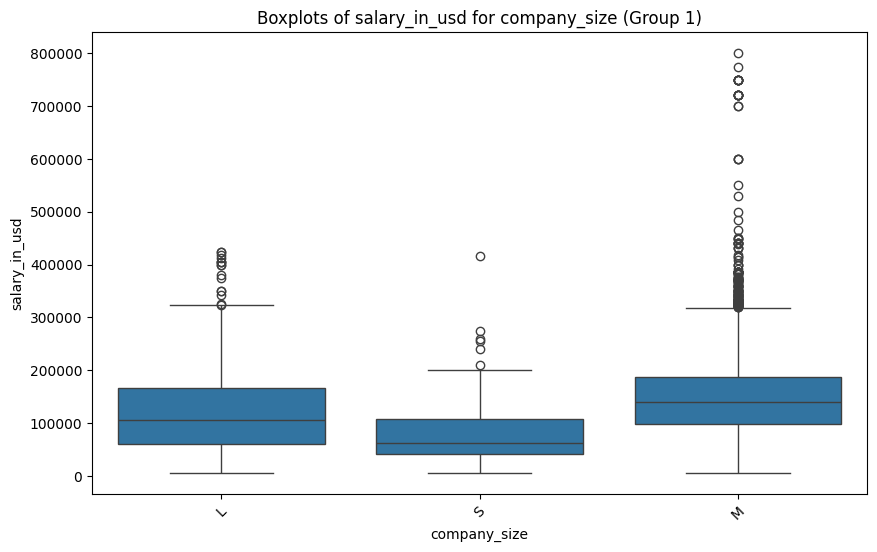

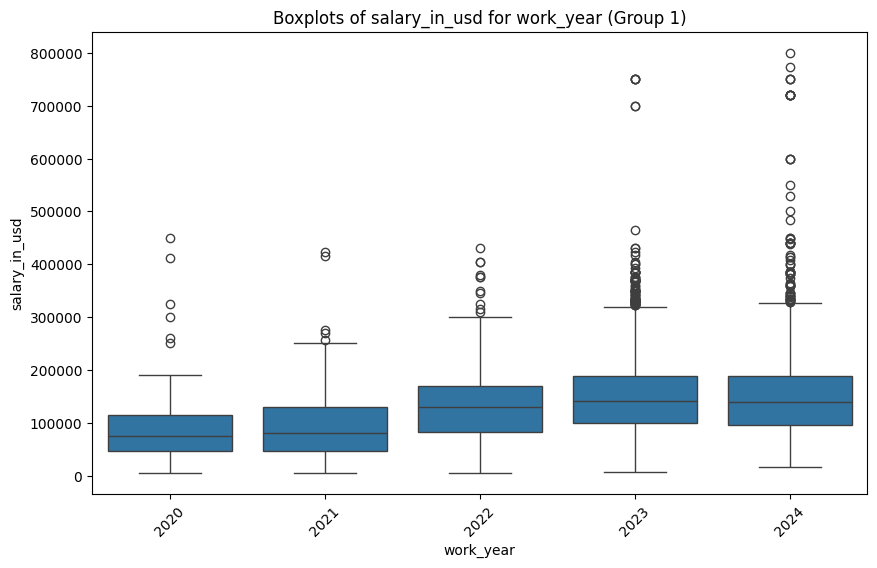

In [ ]:
cat_cols2 = [
    'job_category',
    'experience_level',
    'company_location',
    'employee_residence',
    'work_setting',
    'employment_type',
    'company_size',
    'work_year'
]

dpf.plot_grouped_boxplots(df_combined, cat_cols2, 'salary_in_usd')

In [ ]:
# Group the data by ‘company_location’ and calculate the average wage
salary_data = df_combined.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Download the GeoJSON country file
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
geojson_data = requests.get(geojson_url).json()

# Adjust country names
salary_data['company_location'] = salary_data['company_location'].replace({'United States': 'United States of America'})

# Create the map centred on an initial location
map = folium.Map(location = [0, 0], zoom_start = 2)

# Add the layer of choropleths
folium.Choropleth(
    geo_data = geojson_data,
    name = 'choropleth',
    data = salary_data,
    columns = ['company_location', 'salary_in_usd'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu',
    fill_opacity = 0.8,
    line_opacity = 0.2,
    legend_name = 'Average salary in USD'
).add_to(map)

# Add control layer
folium.LayerControl().add_to(map)

# Save the map
map.save('../utils/choropleth_map.html')

map

#### Analysis according to ...